In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook',ticks = True, grid=False)
from wordcloud import WordCloud, STOPWORDS
import string

In [15]:
# Read in the csv file
x_df = pd.read_csv('tweets.csv')

# Drop the column ID
x_df = x_df.drop(['id'],axis=1)

# Get a summary of the info in the dataframe & check for empty values
print(x_df.info())

# Print the descriptive statistics
print(x_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB
None
              label
count  31962.000000
mean       0.070146
std        0.255397
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


array([[<Axes: title={'center': 'label'}>]], dtype=object)

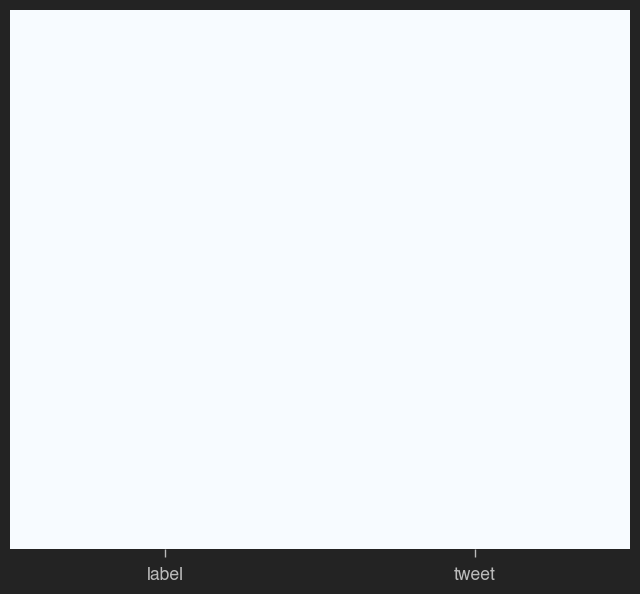

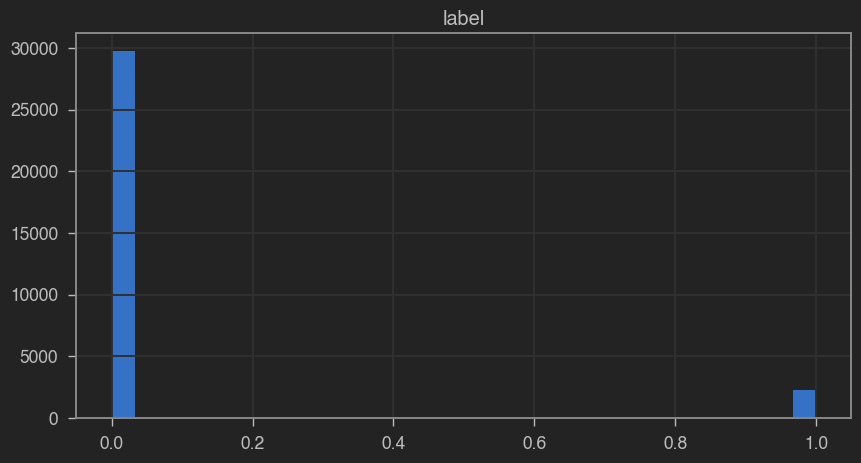

In [16]:
## Exploratory Data Analysis
# Print heatmap to check for null values
sns.heatmap(x_df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

# Plot histogram to analyze distribution
x_df.hist(bins = 30, figsize = (10,5), color = 'b')

In [17]:
# Create new column for the length of the message
x_df['length'] = x_df['tweet'].apply(len)


<Axes: >

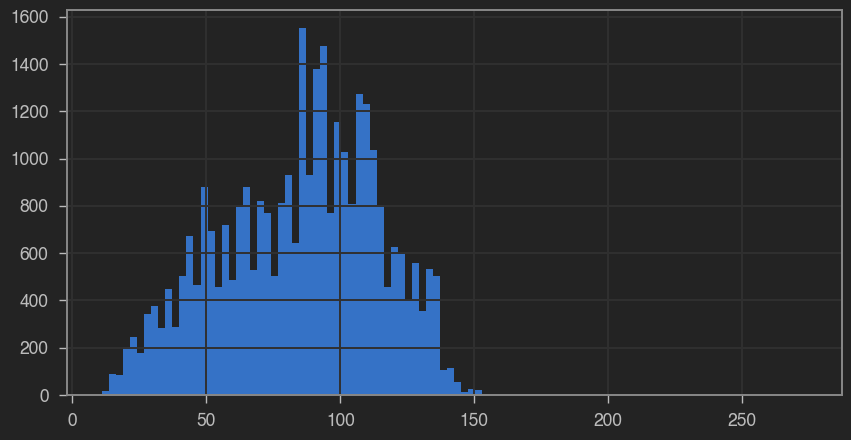

In [18]:
# Show histogram of tweet lengths
x_df['length'].hist(bins = 100, figsize = (10,5), color = 'b')

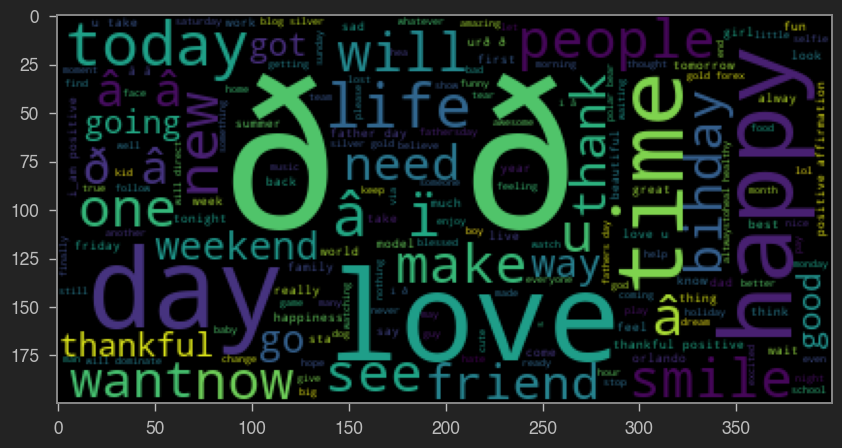

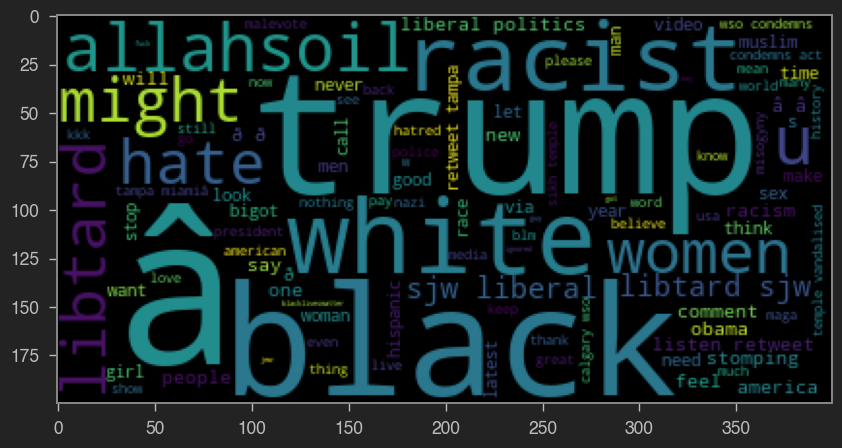

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import string

# Create a list of positive words
positive = x_df[x_df['label'] == 0]
positive_list = positive['tweet'].tolist()
positive_sentences_joined = " ".join(positive_list)

# Create a list of negative words
negative = x_df[x_df['label'] == 1]
negative_list = negative['tweet'].tolist()
negative_sentences_joined = " ".join(negative_list)

# Define a list of stopwords
stopwords = set(STOPWORDS)
stopwords.update(["user", "amp"]) 

def message_cleaning(message):
    # Remove punctuation
    cleaned_message = ''.join([char for char in message if char not in string.punctuation])
    # Return cleaned message
    return cleaned_message

# Apply message cleaning function to the 'tweet' column of x_df
x_df_clean = x_df['tweet'].apply(message_cleaning)

# Create a WordCloud object with custom stopwords
wordcloud = WordCloud(stopwords=stopwords)

# Plot positive word cloud
positive_cleaned = ' '.join(positive_list)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud.generate(positive_cleaned))
plt.show()

# Plot the negative word cloud
negative_cleaned = ' '.join(negative_list)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud.generate(negative_cleaned))
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      5948
           1       0.20      0.57      0.29       445

    accuracy                           0.81      6393
   macro avg       0.58      0.70      0.59      6393
weighted avg       0.91      0.81      0.85      6393



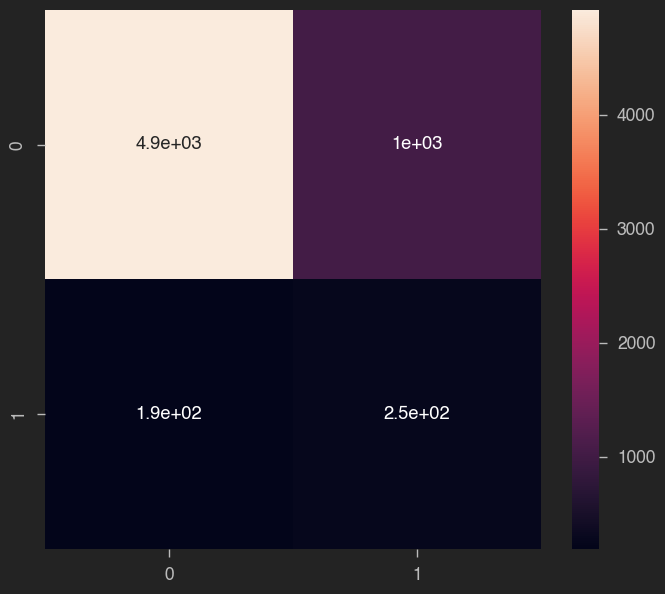

In [13]:
# Define the cleaning pipeline 
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
x_countvectorizer = vectorizer.fit_transform(x_df['tweet'])

# x is a df containing the features for each tweet
X = pd.DataFrame(x_countvectorizer.toarray())

# y is a series containing the corresponding target labels for each tweet
y = x_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the Multinomial Naive Bayes classifier
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True)

# Print classification report
print(classification_report(y_test, y_predict_test))